In [146]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
#custom colorscheme
custom_palette = ["#6495ED", "#66CDAA"]
sns.set_palette(palette=custom_palette)

In [147]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [148]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [149]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [150]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), men['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 335.287500, median: 124.500000
84 men, mean: 511.416667, median: 156.000000


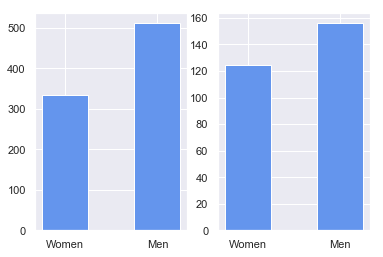

Ttest_indResult(statistic=1.189863660402363, pvalue=0.23584084769518676)


In [151]:
# words,edits,links
print(ttest(Athletes_100m,'words')) 

In [152]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [153]:
descriptions = []

for row in alldata.iterrows():
    desc = row[1][1] + ' ' + row[1][2]
    descriptions.append(desc)
    
alldata['Description'] = np.asarray(descriptions)

In [154]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' + str(len(allmen)) + ' Unassigned: ' + str(len(unassigned)))

Women: 398 Men: 372 Unassigned: 0


In [155]:
#Extreme values on word count column
def extremes_per_sport_wordcount(data, gender):
    #list of all sports disciplines to be used as indices in resulting data frame
    disciplines = data.Event.unique()
    #column names to be used in resulting data frame
    cols = ['Max', 'Min', 'Mean', 'Median']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Wiki_Count.max())
        min.append(all_for_discipline.Wiki_Count.min())
        mean.append(all_for_discipline.Wiki_Count.mean())
        median.append(all_for_discipline.Wiki_Count.median())
    return pd.DataFrame({'Max' :np.asarray(max),
                         'Min' :np.asarray(min),
                         'Mean':np.asarray(mean),
                         'Median':np.asarray(median)}, index=disciplines)

In [156]:
def plot_wordcount(data):
    # labels for y axis
    labels = data.Event.unique()
    # amount of ticks on y axis
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_wordcount(data, 'Men')
    extremes_women = extremes_per_sport_wordcount(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2,figsize=(30,15))
    ax[0,0].bar(ind + width/2, extremes_women.Max, width, label='Women')
    ax[0,0].bar(ind - width/2, extremes_men.Max, width, label='Men')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Word Count')
    ax[0,0].set_title('Max Word Count')
    
    ax[0,1].bar(ind + width/2, extremes_women.Min, width, label='Women')
    ax[0,1].bar(ind - width/2, extremes_men.Min, width, label='Men')
    
    ax[0,1].legend()
    
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Word Count')
    ax[0,1].set_title('Min Word Count')
    
    ax[1,0].bar(ind + width/2, extremes_women.Mean, width, label='Women')
    ax[1,0].bar(ind - width/2, extremes_men.Mean, width, label='Men')
    
    ax[1,0].legend()
    
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Word Count')
    ax[1,0].set_title('Mean Word Count')
    
    ax[1,1].bar(ind + width/2, extremes_women.Median, width, label='Women')
    ax[1,1].bar(ind - width/2, extremes_men.Median, width, label='Men')
    
    ax[1,1].legend()
    
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Word Count')
    ax[1,1].set_title('Median Word Count')
 
    plt.show()

<Figure size 432x288 with 0 Axes>

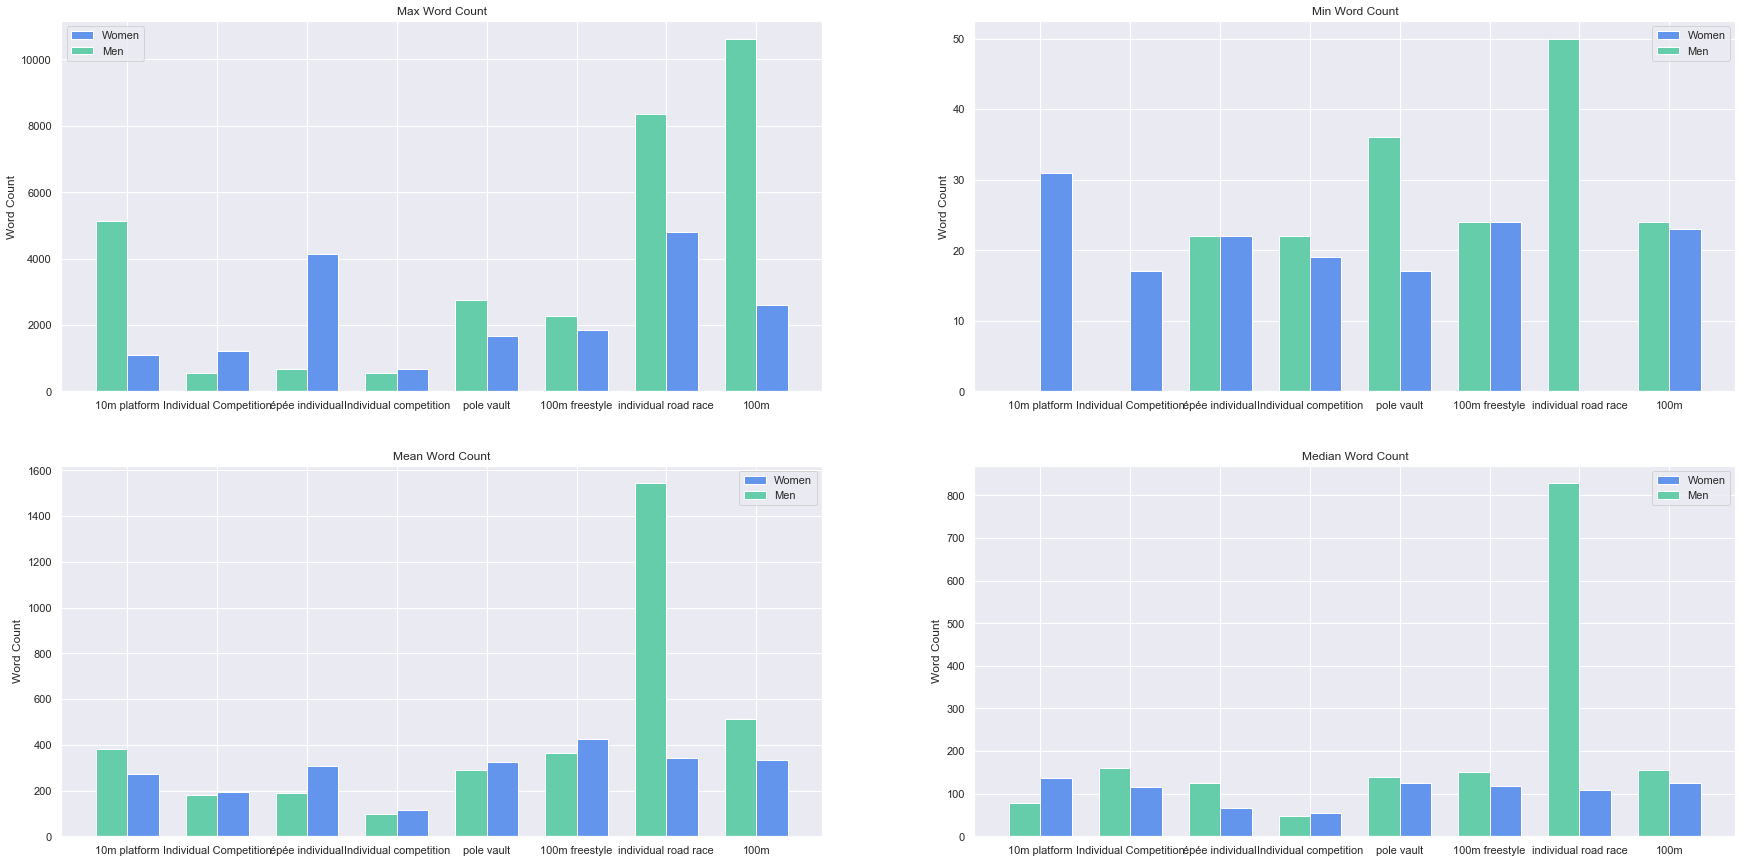

In [157]:
plot_wordcount(alldata)

In [158]:
#Extreme values on edit column
def extremes_per_sport_edits(data, gender):
    disciplines = data.Event.unique()
    cols = ['Max_Edits', 'Min_Edits', 'Mean_Edits', 'Median_Edits']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Event'] == discipline]
        max.append(all_for_discipline.Edits.max())
        min.append(all_for_discipline.Edits.min())
        mean.append(all_for_discipline.Edits.mean())
        median.append(all_for_discipline.Edits.median())
    return pd.DataFrame({'Max_Edits' :np.asarray(max),
                         'Min_Edits' :np.asarray(min),
                         'Mean_Edits':np.asarray(mean),
                         'Median_Edits':np.asarray(median)}, index=disciplines)

In [159]:
def plot_edits(data):
    labels = data.Event.unique()
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport_edits(data, 'Men')
    extremes_women = extremes_per_sport_edits(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2, figsize=(30,15))
    ax[0,0].bar(ind + width/2, extremes_women.Max_Edits, width, label='Women')
    ax[0,0].bar(ind - width/2, extremes_men.Max_Edits, width, label='Men')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Edits')
    ax[0,0].set_title('Max Edits')
        
    ax[0,1].bar(ind + width/2, extremes_women.Min_Edits, width, label='Women')
    ax[0,1].bar(ind - width/2, extremes_men.Min_Edits, width, label='Men')
    
    ax[0,1].legend()
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Edits')
    ax[0,1].set_title('Min Edits')
    
    ax[1,0].bar(ind + width/2, extremes_women.Mean_Edits, width, label='Women')
    ax[1,0].bar(ind - width/2, extremes_men.Mean_Edits, width, label='Men')
    
    ax[1,0].legend()
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Edits')
    ax[1,0].set_title('Mean Edits')
    
    ax[1,1].bar(ind + width/2, extremes_women.Median_Edits, width, label='Women')
    ax[1,1].bar(ind - width/2, extremes_men.Median_Edits, width, label='Men')
    
    ax[1,1].legend()
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Edits')
    ax[1,1].set_title('Median Edits')
 
    plt.show()

<Figure size 432x288 with 0 Axes>

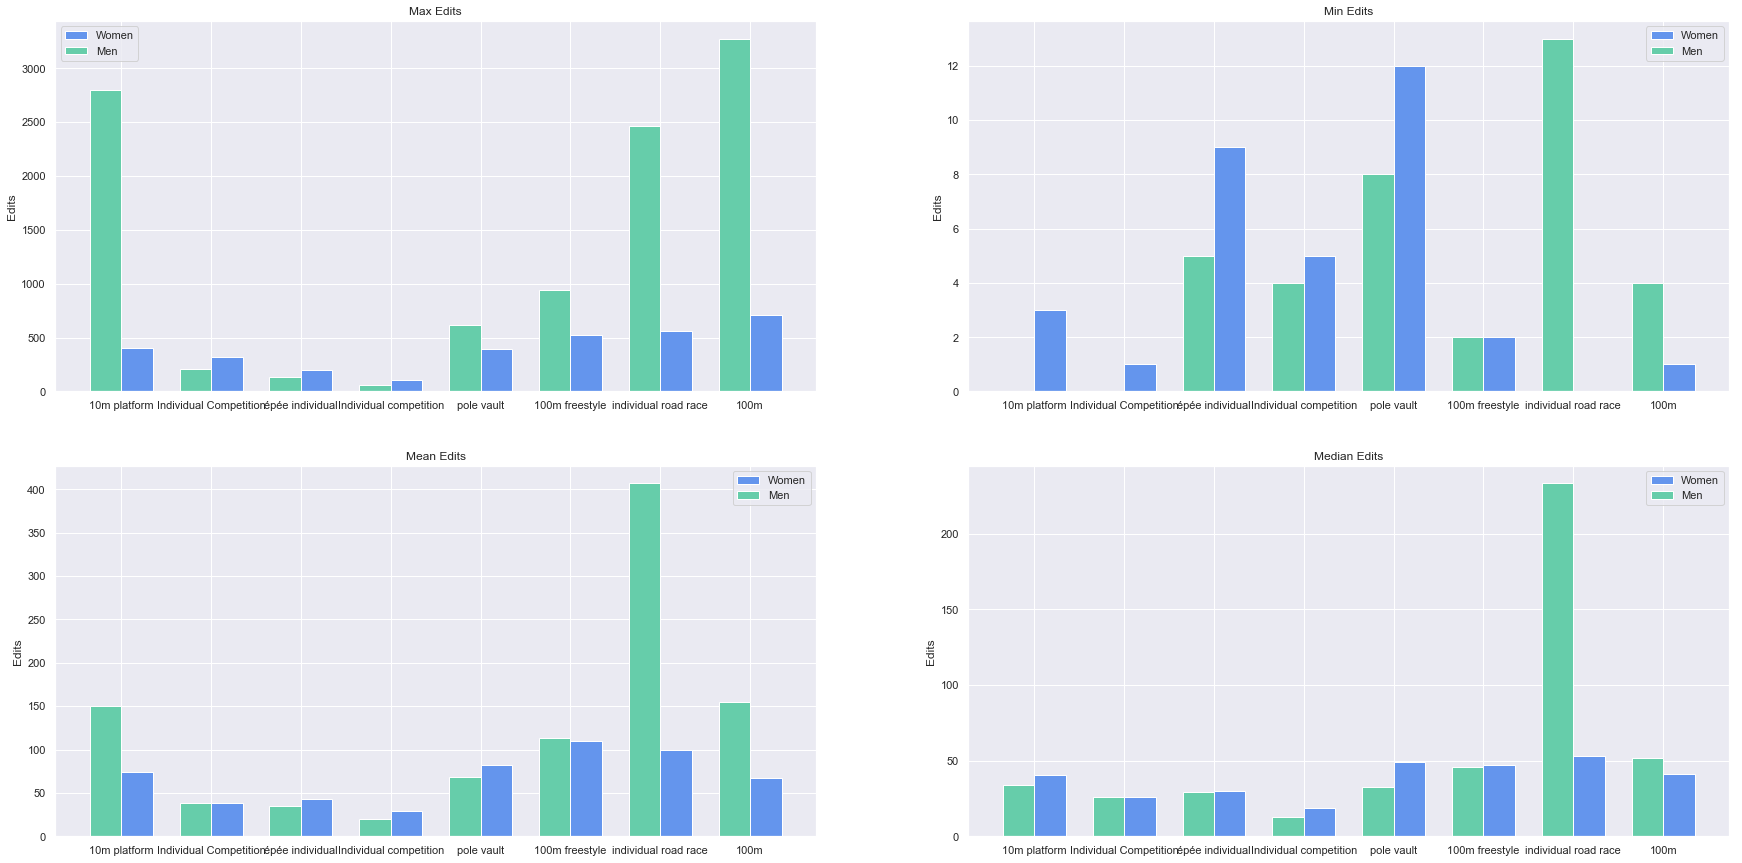

In [160]:
plot_edits(alldata)

In [161]:
# extremes_per_sport(alldata, 'Men')

In [162]:
# extremes_per_sport(alldata, 'Women')

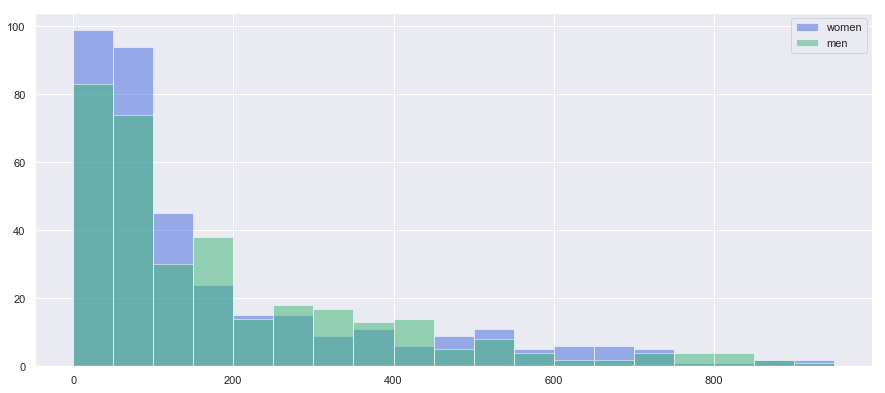

In [163]:
#gendered histogram of all word count data
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="royalblue")
plt.hist(men, bins, alpha=0.5, label='men', color="mediumseagreen")

plt.legend()
plt.show()

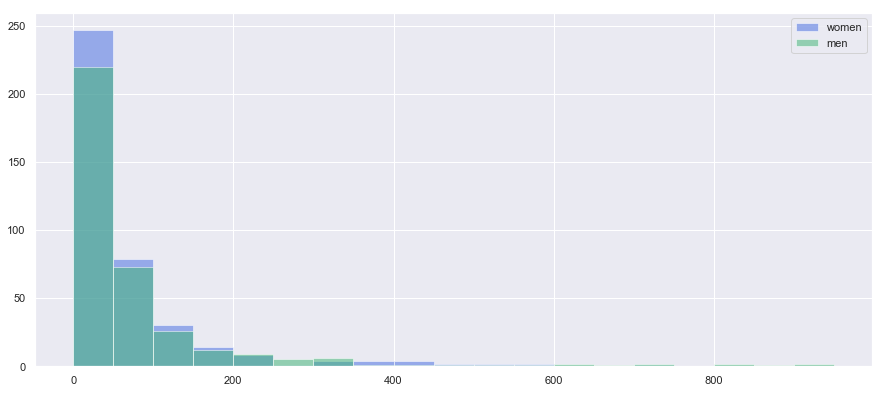

In [164]:
#gendered histogram of all edit data
men = alldata.loc[alldata['Gender'] == 'Men'].Edits
women = alldata.loc[alldata['Gender'] == 'Women'].Edits

bins = range(0, 1000, 50)

plt.figure(figsize=(15,6.5))
plt.hist(women, bins, alpha=0.5, label='women', color="royalblue")
plt.hist(men, bins, alpha=0.5, label='men', color="mediumseagreen")


plt.legend()
plt.show()

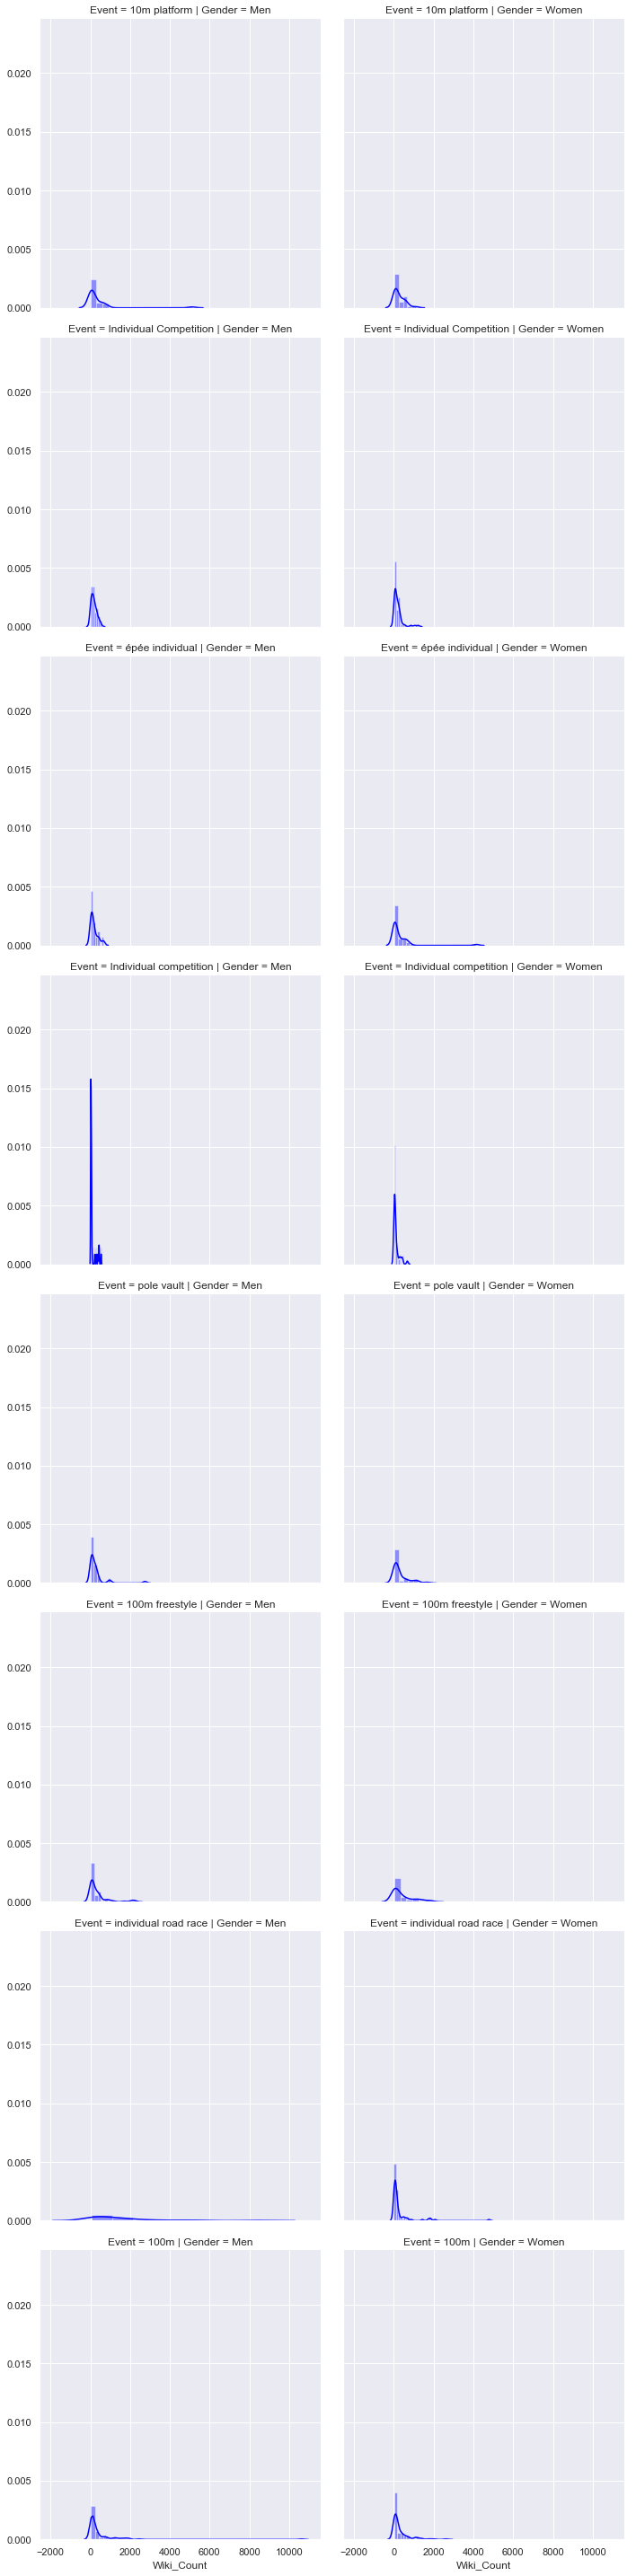

In [165]:
#histograms using fancy seaborn but the result is kind of strange ...
g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
# g = (g.map(plt.hist,"Wiki_Count").set_titles("{col_name}"))
g = g.map(sns.distplot, "Wiki_Count", color="blue")

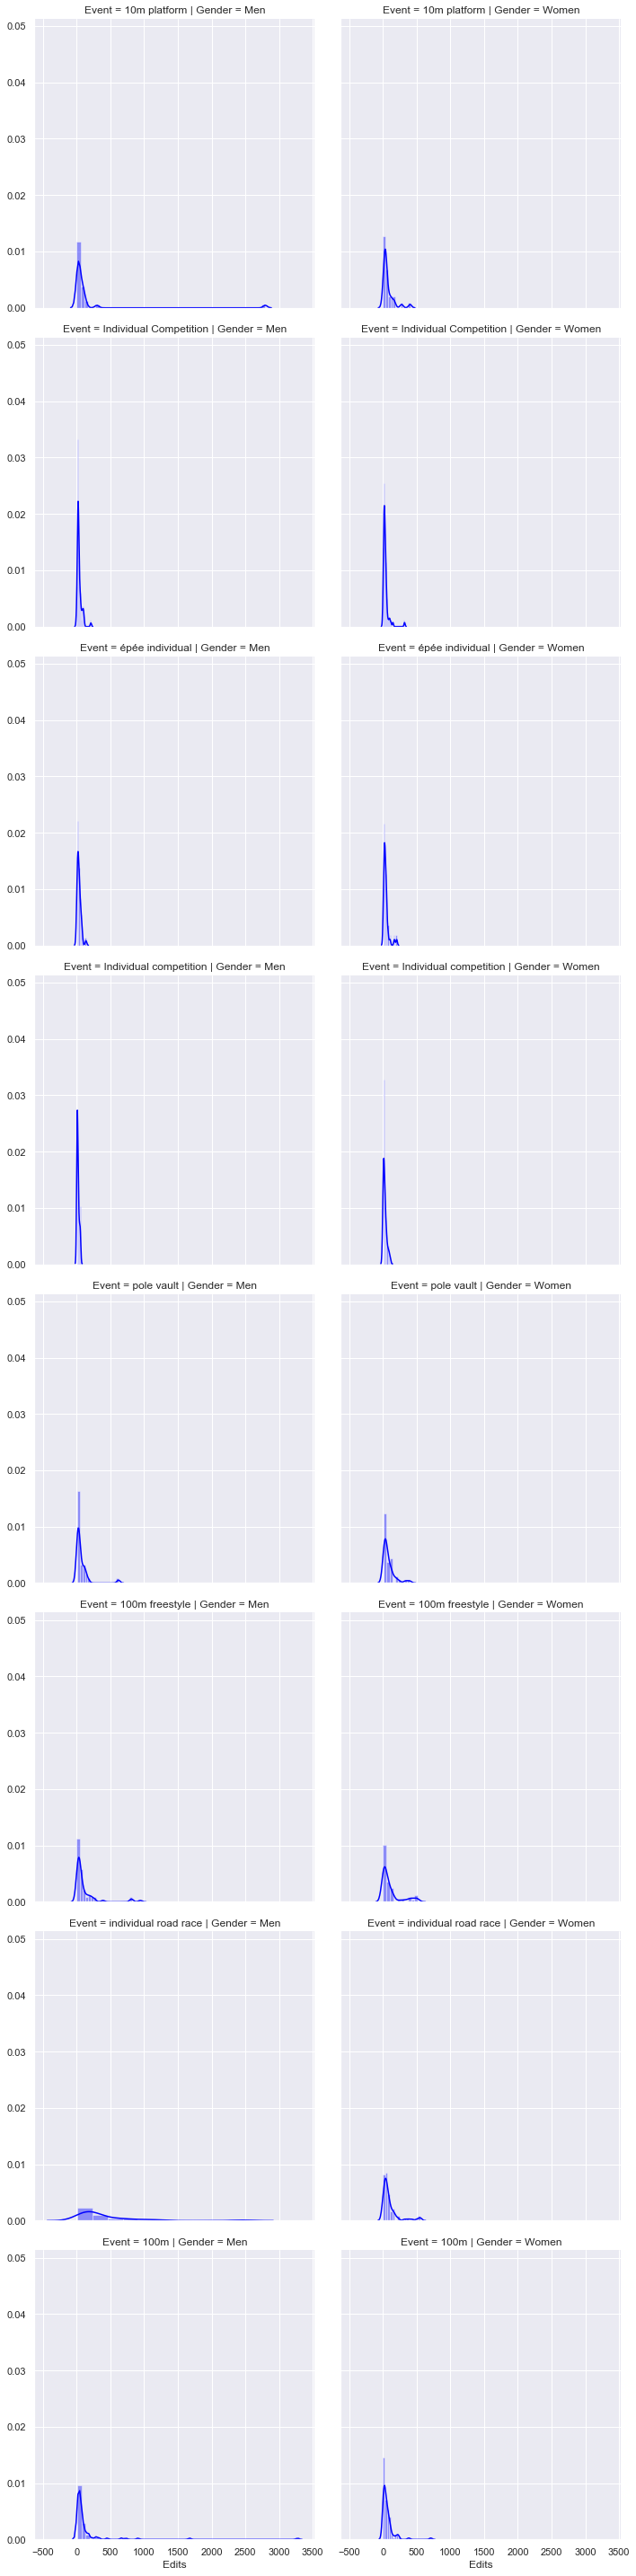

In [166]:
#same seaborn histograms but for edits instead of word count
g = sns.FacetGrid(alldata, col="Gender", row="Event", height=5, aspect=1)
g = g.map(sns.distplot, "Edits", color="blue")

<Figure size 432x288 with 0 Axes>

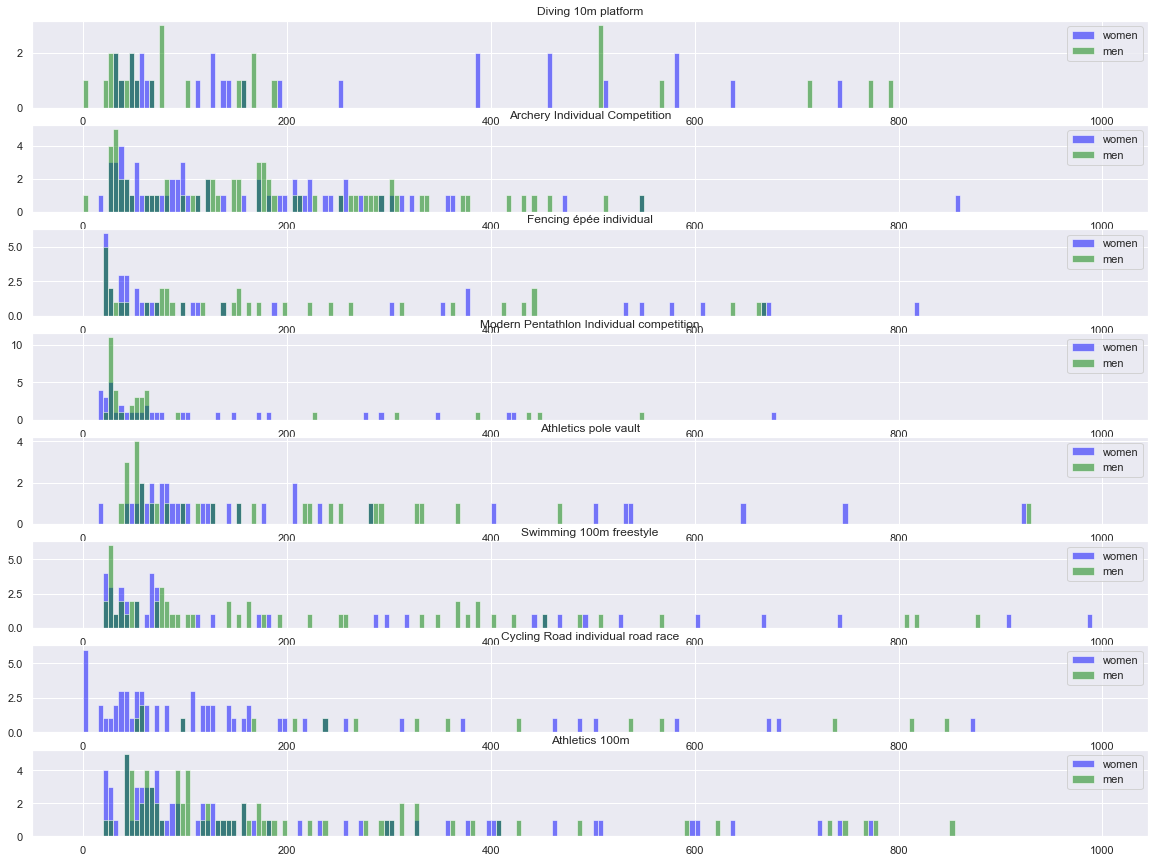

In [167]:
#word count histograms using normal matplotlib
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#This plot doesn't show all data
bins = range(0, 1000, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,15))
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="blue", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Wiki_Count, bins, color="green", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])

<Figure size 432x288 with 0 Axes>

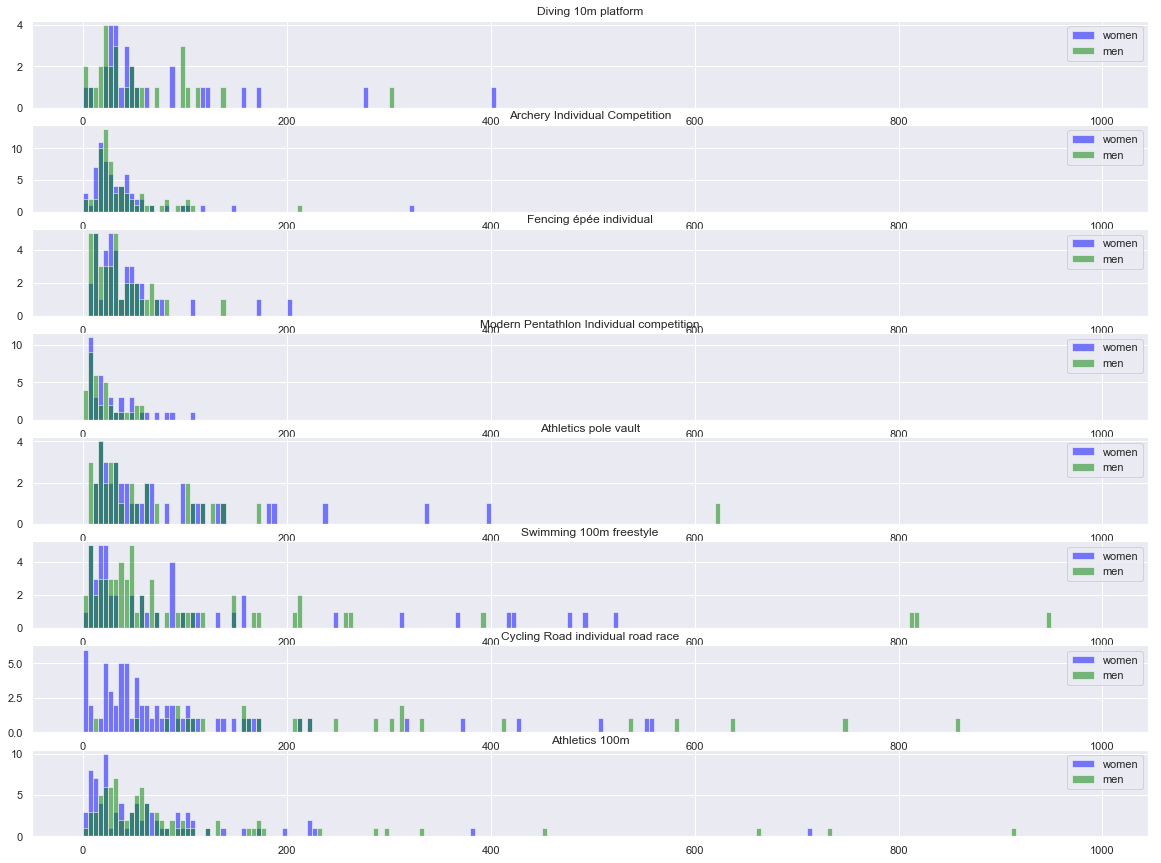

In [168]:
#edits histograms using normal matplotlib
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
bins = range(0, 1000, 5)

all_disciplines = np.asarray(alldata.Event.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,15))
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Event'] == all_disciplines[row_number]].Edits, bins, color="blue", alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Event'] == all_disciplines[row_number]].Edits, bins, color="green", alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(alldata.Description.unique()[row_number])

In [169]:
#all ttests
# stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
ttest_results = []
pvalues = []
for discipline in all_disciplines:
    ttest_result = stats.ttest_ind(men.loc[men['Event'] == discipline].Wiki_Count,
                                         women.loc[women['Event'] == discipline].Wiki_Count)
    ttest_results.append(ttest_result.statistic)
    pvalues.append(ttest_result.pvalue)

pd.DataFrame({'Discipline' :np.asarray(alldata.Description.unique()),
              'Ttest Statistic' :np.asarray(ttest_results),
              'P Value': np.asarray(pvalues)})

,Discipline,Ttest Statistic,P Value
0,Diving 10m platform,0.602448,0.549352
1,Archery Individual Competition,-0.279971,0.779959
2,Fencing épée individual,-1.008100,0.316736
3,Modern Pentathlon Individual competition,-0.495596,0.621732
4,Athletics pole vault,-0.296361,0.767858
5,Swimming 100m freestyle,-0.572962,0.567895
6,Cycling Road individual road race,4.545968,0.000016
7,Athletics 100m,1.189864,0.235841


In [170]:
#Number of ppl of specified gender per sport
#This method is mostly for us
def gender_per_sport(data):
    disciplines = data.Event.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Event'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Event'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=disciplines)

In [171]:
# gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants

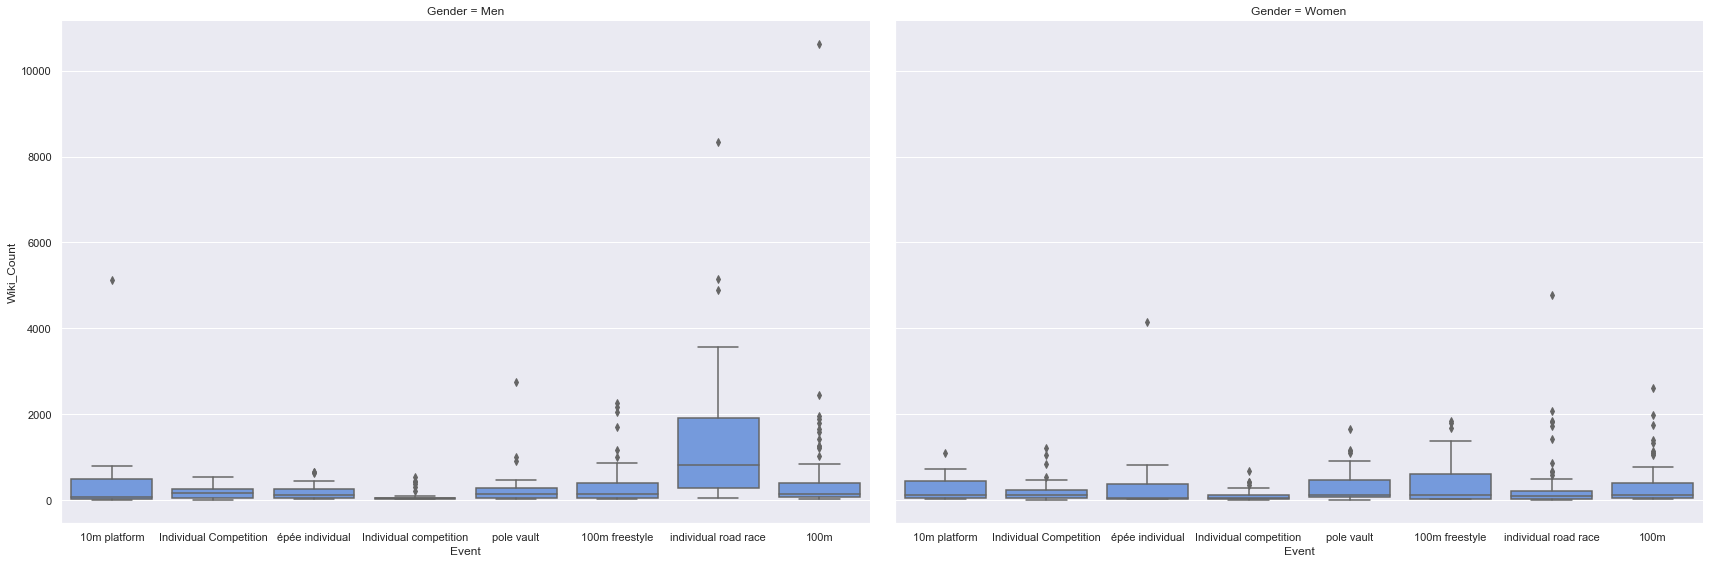

In [172]:
#boxplot for word count
g = sns.FacetGrid(alldata, col="Gender", height=8, aspect=1.5)
g.map(sns.boxplot,"Event", "Wiki_Count", order=alldata.Event.unique())

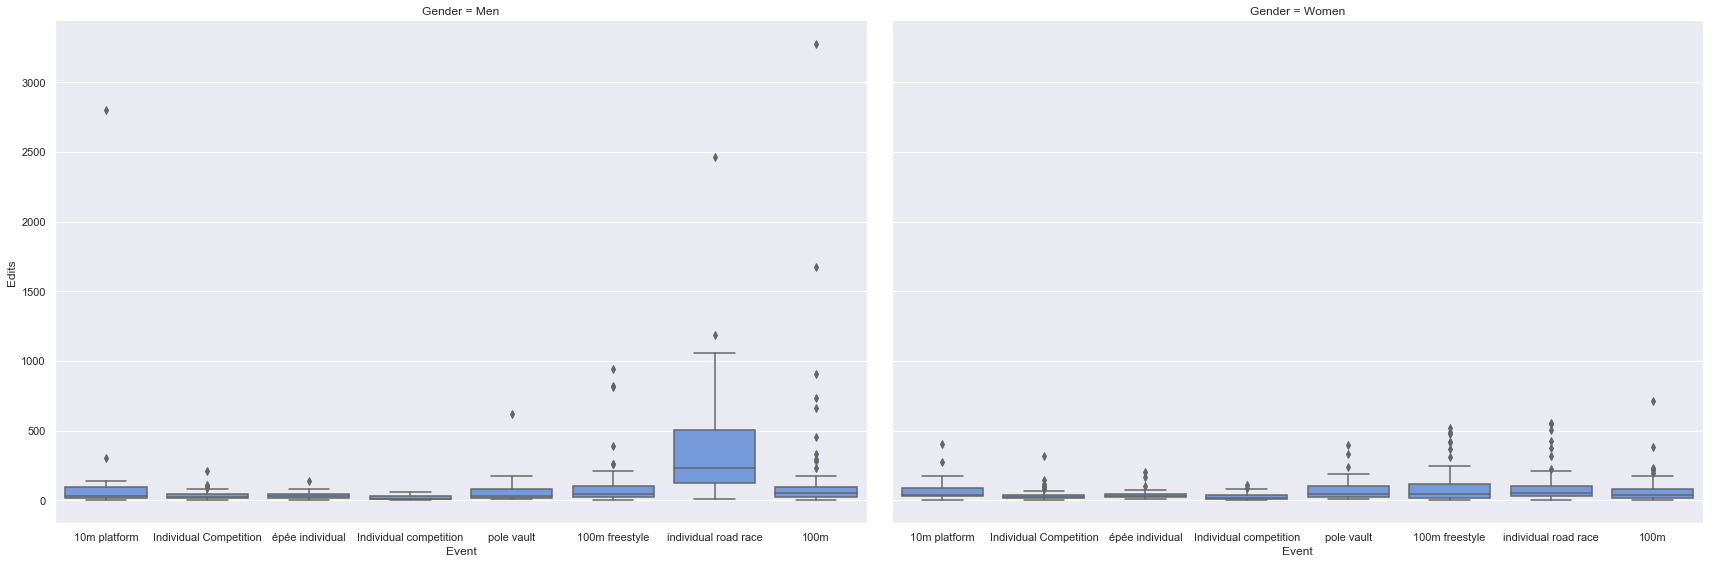

In [173]:
#boxplot for edits
g = sns.FacetGrid(alldata, col="Gender", height=8, aspect=1.5)
g.map(sns.boxplot,"Event", "Edits", order=alldata.Event.unique())

In [174]:
g = sns.FacetGrid(alldata, col="Gender",  height=8, aspect=1.5, hue="Event")
g.map(sns.stripplot,"Event", "Wiki_Count", order = alldata.Event.unique())

In [175]:
g = sns.FacetGrid(alldata, col="Gender",  height=8, aspect=1.5, hue="Event")
g.map(sns.stripplot,"Event", "Edits", order = alldata.Event.unique())

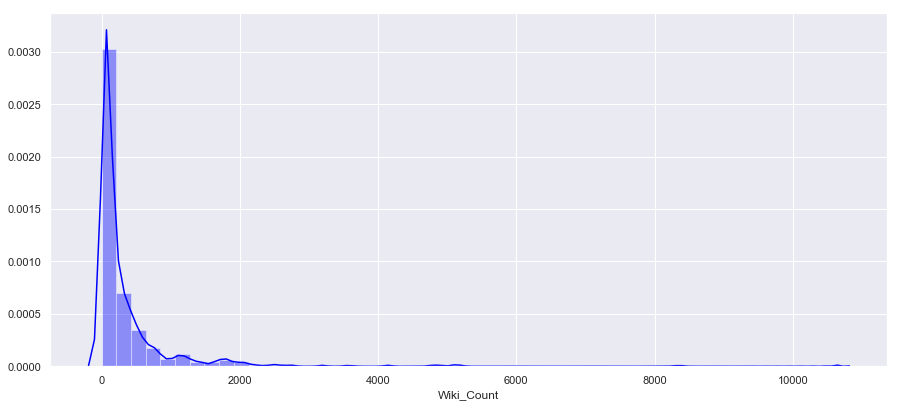

In [176]:
#histogram of all data for word count
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Wiki_Count, color="blue")
plt.show()

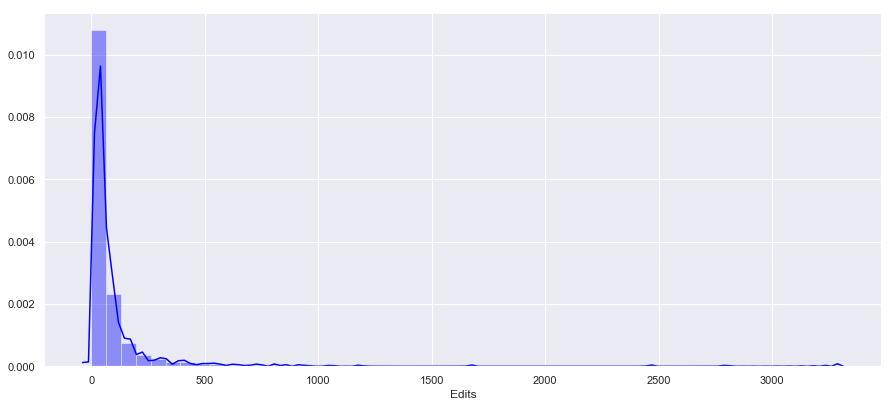

In [177]:
#histogram of all data for edits
plt.figure(figsize=(15,6.5))
sns.distplot(alldata.Edits, color="blue")
plt.show()

Text(0.5, 1.0, 'Edits vs Words per Article')

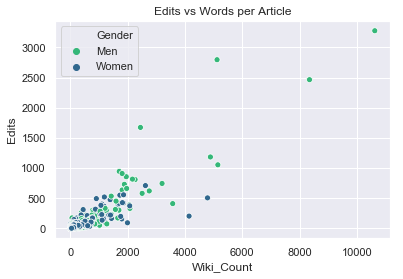

In [178]:
#scatterplot - hypothesis: the more words per article, the more edits
sns.set()
ax = sns.scatterplot(x="Wiki_Count", y="Edits", hue="Gender", palette="viridis_r", sizes=(10, 200), data=alldata)
plt.title('Edits vs Words per Article')

In [179]:
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
#Mann-Whitney U is significant if the u-obtained is LESS THAN or equal to the critical value of U.
#Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
# Do the Wordcounts differ by the sex of the athlete?
#Source: https://www.statisticssolutions.com/mann-whitney-u-test/
stats.mannwhitneyu(men.Wiki_Count, women.Wiki_Count)

MannwhitneyuResult(statistic=68133.5, pvalue=0.02799997038752015)

In [180]:
all_disciplines = np.asarray(alldata.Event.unique())
amout_of_disciplines = len(all_disciplines)
utest_results = []
pvalues = []
for discipline in all_disciplines:
    utest_result = stats.mannwhitneyu(men.loc[men['Event'] == discipline].Wiki_Count,
                                         women.loc[women['Event'] == discipline].Wiki_Count)
    utest_results.append(utest_result.statistic)
    pvalues.append(utest_result.pvalue)

pd.DataFrame({'Discipline' :alldata.Description.unique(),
              'Utest Statistic' :np.asarray(utest_results),
              'P Value': np.asarray(pvalues)})

,Discipline,Utest Statistic,P Value
0,Diving 10m platform,345.5,1.690800e-01
1,Archery Individual Competition,1902.0,2.440222e-01
2,Fencing épée individual,650.5,2.906772e-01
3,Modern Pentathlon Individual competition,620.0,3.782122e-01
4,Athletics pole vault,549.0,2.451830e-01
5,Swimming 100m freestyle,1398.0,4.563503e-01
6,Cycling Road individual road race,361.5,2.591859e-07
7,Athletics 100m,2958.5,9.354463e-02
